

#**Information Visualization Practical Work**

Students:
*   Bistreanu Maria
*   Stanciu Iulia

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import altair as alt

In [ ]:
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [ ]:
dtypes = {

    "Publication_year": "int64",
    "ID_article": "category",
    "Title_article": "category",
    "ISSN_journal": "category",
    "Title_journal": "category",
    "Journal_area_research": "category",
    "ID_author": "category",
    "Full_name_author": "category",
    "Department_UPC": "category",
    "Research_group_UPC": "category",
}

source = "https://raw.githubusercontent.com/Bistreamt/VI_project1/main/Draft_3_VI_Project_1_Bistreanu_Stanciu_openrefine.csv"

df = pd.read_csv(source, dtype=dtypes)

df.head()

,Publication_year,ID_article,Title_article,ISSN_journal,Title_journal,Journal_area_research,ID_author,Full_name_author,Department_UPC,Research_group_UPC
0,2010,1189105,Climatology of the aerosol extinction-to-backs...,0196-2892,IEEE transactions on geoscience and remote sen...,Earth and Planetary Sciences (miscellaneous),178925,Jose M. B. R.,Departament d'Enginyeria de Projectes i de la ...,NaN
1,2010,1189105,Climatology of the aerosol extinction-to-backs...,0196-2892,IEEE transactions on geoscience and remote sen...,Earth and Planetary Sciences (miscellaneous),180075,Francisco R. B.,Departament de Teoria del Senyal i Comunicacions,RSLAB - Grup de Recerca en Teledeteccio
2,2010,1189105,Climatology of the aerosol extinction-to-backs...,0196-2892,IEEE transactions on geoscience and remote sen...,Earth and Planetary Sciences (miscellaneous),182048,Michael S.,Departament de Teoria del Senyal i Comunicacions,CTE-CRAE - Grup de Recerca en Ciencies i Tecno...
3,2010,1189711,A survey on performance management for Interne...,1532-0626,Concurrency and computation: practice and expe...,Theoretical Computer Science,178202,Eduard A. P.,Departament d'Arquitectura de Computadors,CAP - Grup de Computacio d'Altes Prestacions
4,2010,1189711,A survey on performance management for Interne...,1532-0626,Concurrency and computation: practice and expe...,Theoretical Computer Science,178250,Jordi T. V.,Departament d'Arquitectura de Computadors,CAP - Grup de Computacio d'Altes Prestacions


***Question 1: How have the different departments performed along the last years?***

Steps to vizualization:


*   Remove entries without department
*   Group by year, then by department, show the number of different articles (got from ID_article)

Characteristics for vizualization:

*   2 keys – categorical, one value - quantitive
*   Type of chart - HeatMap 
*   Departaments of UPC on vertical axis for readability
*   Years on horizontal axis
*   Color encoding for number of articles per year per department
*   Visual friendly color scale

In [ ]:
df_ex1 = df.groupby(["Publication_year", "Department_UPC"])["ID_article"].nunique()
df_ex1.to_csv('output_draft_ex1.csv')

df_ex1.head()


Publication_year  Department_UPC                                                                    
2010              Centre Específic de Recerca de Mètodes Numèrics en Ciències Aplicades i Enginyeria     0
                  Centre Tecnològic de Vilanova i la Geltrú                                              3
                  Centre de Desenvolupament de Sensors, Instrumentació i Sistemes                        0
                  Càtedra UNESCO de Sostenibilitat                                                       2
                  Departament d'Arquitectura de Computadors                                             73
Name: ID_article, dtype: int64

In [ ]:
source1 = "https://raw.githubusercontent.com/Bistreamt/VI_project1/main/output_draft_ex1.csv"

alt.Chart(
    source1,
    title="Departament performance in the last years (experessed as number of articles)"
).mark_rect().encode(
    x=alt.X('Publication_year:O', title='Publication year'),
    y=alt.X('Department_UPC:O', title='Department in UPC'),
    color=alt.Color('max(ID_article):Q', title='Number of articles', scale=alt.Scale(scheme="plasma")),
    tooltip=[
        alt.Tooltip('max(ID_article):Q', title='Number of articles')
    ]
).properties(width=600)

alt.Chart(...)

***Answer to Question 1:***

Trend: Analysing by year (until 2021, or even 2022), we can see that a consistency in the number of articles published by each department in UPC.
The most productive years per department can easily bee seen, and we can take notice to the Department of Civil Engineering who is by far the most productive, with over 200 articles per year(until 2022) and more than 300 articles per year in the COVID-19 pandemic period (2020-2021). The same rising trend in the corona-period can be observed for the Departament of Physics and Departament of Chimical Engineering. 

Most performant departments: Department of Civil Engineering.

Least performant departments have less than 50 articles per year, some even 0. 


***Question 2: How have the different research groups performed along the last years?***


Steps to vizualization:


*   Remove entries without research group
*   Group by period in time - devide in groups of 3 years, excluding 2022 because we don't have a full year and 2023 because we can't talk about "articles of the future"
*   Group by Research Group in UPC
*   Show the number of different articles (got from ID_article)


Characteristics for vizualization:

*   2 keys – categorical, one value - quantitive
*   Type of chart - Line Graph
*   Departaments of UPC on horizoltal axis because of the number
*   Color encoding for period of time

In [ ]:
df_ex2 = df.groupby([pd.cut(df["Publication_year"], np.arange(2009, 2023, 3)), "Research_group_UPC"])["ID_article"].nunique()
df_ex2.to_csv('output_draft_ex2.csv')

df_ex2.head()

Publication_year  Research_group_UPC                                                
(2009, 2012]      (TIEG) - Terrassa Industrial Electronics Group                         12
                  ACC - Arquitectura, Ciutat i Cultura                                   37
                  ACES - Control Avancat de Sistemes d'Energia                           49
                  ACM - Analisis Critiques de la Modernitat: Arquitectura i Ciutat      122
                  ADBD - Analisi de Dades Complexes per a les Decisions Empresarials     36
Name: ID_article, dtype: int64

In [ ]:
source2 = "https://raw.githubusercontent.com/Bistreamt/VI_project1/main/output_draft_ex2.csv" 

print("Research group performance in the last years (experessed as number of articles)")

base=alt.Chart(source2, title="Research group performance in the last years (experessed as number of articles)").mark_line().encode(
    y=alt.Y('ID_article:Q', title='Number of articles'),
    x=alt.X('Research_group_UPC:O', title='Research group in UPC'),
    color=alt.Color('Publication_year:N', title='Publication period')
)
# .configure_title(anchor='start')

highlight = alt.selection(type='single', on='mouseover',
                          fields=['Publication_year'], nearest=True)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines

Research group performance in the last years (experessed as number of articles)


alt.LayerChart(...)

***Answer to Question 2:***

Trend in time: The number of articles published by each of the research areas in UPC is more or less consistent. Some were more active in the past (example ACC), while others had no activity untill recently (example CERESCA).

Changes during the COVID-19 Pandemic(2020-2022): Some groups were affected positively by the pandemic, as the number of published articles rised in the period 2020-2022 (example SAC, TECNOFAB), while others had almost no activity in the given period (example DISEN, CDAL).

Most performant research group in the last 3 years: COSDA-UPC, with more than 180 articles.

***Question 3: Is there any correlation between department size and production?***

Steps to vizualization:


*   Remove entries without department
*   Group by Departament of UPC
*   Represent number of articles/department and people/department

Characteristics for vizualization:

*   1 key categorical, 2 values – quantitive
*   Type of chart - Scatter plot/Bubble chart
*   Bubbles of differet sizes representing production
*   Axis representing departments and number of different people in a department


In [ ]:
df_ex3 = df.groupby(["Department_UPC"])["ID_author", "ID_article"].nunique()
df_ex3.to_csv('output_draft_ex3.csv')

df_ex3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ID_author,ID_article
Department_UPC,,
Centre Específic de Recerca de Mètodes Numèrics en Ciències Aplicades i Enginyeria,4,21
Centre Tecnològic de Vilanova i la Geltrú,2,121
"Centre de Desenvolupament de Sensors, Instrumentació i Sistemes",5,42
Càtedra UNESCO de Sostenibilitat,1,9
Departament d'Arquitectura de Computadors,103,1033


In [270]:
source3 = "https://raw.githubusercontent.com/StanciuIulia/VI_Project_2022/main/output_ex3.csv"

alt.Chart(source3, title = "Corelation between departament size and production").mark_circle(size=100, color='purple', filled=True, opacity=0.7).encode(
    x=alt.X('ID_author:Q', title = 'Number of authors'),
    y=alt.Y('Department_UPC:O', title = 'Departament in UPC', sort='x'),
    size=alt.Size('ID_article:Q', title = 'Number of articles'),
    tooltip=['Department_UPC:O', 'ID_author:O', 'ID_article:Q']
).properties(width=800).interactive()

alt.Chart(...)

***Answer to Question 3:***

Corelation: The number of articles published by each of department is strongly related how many members it has. From what can be seen, the Department of  Civil and Ambiental Engineering has the biggest number of articles and also the most authors.

***Question 4: Do any departments produce more papers per person?***

Steps to vizualization:


*   Remove entries without department
*   Group by Departament of UPC
*   Group by Author
*   Repressent the maximum, minimum, average number of articles per person per department

Characteristics for vizualization:

*   1 key categorical, multiple values – quantitive (average and maximum are most important)
*   Type of chart - Box plot/Violin chart/Ridge plot

Alternative version: Representing the average number of articles per person per department

In [ ]:
df_ex4 = df.groupby(["Department_UPC", "ID_author"])["ID_article"].nunique().reset_index().rename(columns={'ID_article':'Number_articles'})
df_ex4 = df_ex4[df_ex4.Number_articles != 0]
df_ex4.to_csv('output_draft_ex4.csv')

In [ ]:
authors = df.groupby(["Department_UPC"])["ID_author"].nunique().reset_index().rename(columns={'ID_author':'Number_authors'})
print(authors.head())

art = df.groupby(["Department_UPC"])["ID_article"].nunique().reset_index().rename(columns={'ID_article':'Number_articles'})
print(art.head())

ex4 = pd.DataFrame([])
ex4["Department_UPC"] = df["Department_UPC"]
ex4["Average_art_pers"] = art['Number_articles']/authors['Number_authors']

ex4.to_csv('average_articles_ex4.csv')

                                      Department_UPC  Number_authors
0  Centre Específic de Recerca de Mètodes Numèric...               4
1          Centre Tecnològic de Vilanova i la Geltrú               2
2  Centre de Desenvolupament de Sensors, Instrume...               5
3                   Càtedra UNESCO de Sostenibilitat               1
4          Departament d'Arquitectura de Computadors             103
                                      Department_UPC  Number_articles
0  Centre Específic de Recerca de Mètodes Numèric...               21
1          Centre Tecnològic de Vilanova i la Geltrú              121
2  Centre de Desenvolupament de Sensors, Instrume...               42
3                   Càtedra UNESCO de Sostenibilitat                9
4          Departament d'Arquitectura de Computadors             1033


In [265]:
source4 = 'https://raw.githubusercontent.com/Bistreamt/VI_project1/main/output_draft_ex4.csv'

alt.Chart(source4, title = "Distribution of articles per person in each depratment of UPC").mark_boxplot(extent='min-max', size=15, color='purple').encode(
    x=alt.X('Department_UPC:N', title='Departament of UPC'),
    y=alt.Y('Number_articles:Q', title ='Number of articles per person', scale=alt.Scale(zero=False))
).interactive()

alt.Chart(...)

***Answer to Question 4:***

This chart shows the average, minimum and maximum number of articles writen by a person in each departament. 
The Center of technology de Vilanova is remarkable in the number of articles writen by one person over 14 years, the mean value being almost 70, and the maximum reaching 120. 

Some others have 0 ar olmost 0 articles in the given period.

For the rest the average numbers of artilces per person is between 0 and 20, and mostly over 10. The maximum and minimum are variant and some really productive authors can be seen in 7 departaments by the high lines starting from the boxes. 

***Question 5: How big is each area of research (the journal area of research in the dataset) in UPC?***

Steps to vizualization:


*   •	Group by area of research of journal (remove entries with empty values because we can not make assumptions) 
*   Represent the number of people in each area of research of the journal

Characteristics for vizualization:

*   1 key categorical - area, 1 value quantitive - number of people
*   Type of chart - Bar chart/dot plot - a bar chart was chosen for more visibility

In [ ]:
df_ex5 = df.groupby(["Journal_area_research"])["ID_author"].nunique().reset_index().rename(columns={'ID_author':'Number_authors'}).sort_values(["Number_authors"],ascending = False)
df_ex5 = df_ex5[df_ex5.Number_authors != 0]
df_ex5.to_csv('output_draft_ex5.csv')

In [264]:
source5 = 'https://raw.githubusercontent.com/Bistreamt/VI_project1/main/output_draft_ex5.csv'

alt.Chart(source5, title = "Dimension of research area of journal in UPC").mark_bar(color='purple').encode(
    x=alt.X('Journal_area_research:N', title='Journal area of research', sort=None),
    y=alt.Y('Number_authors:Q', title ='Number of authors from UPC', sort=None)
).configure_title(anchor='start').interactive()

alt.Chart(...)

***Answer to Question 5:***

The graph shows that the size of the research area varies from more than 500 to 0 people. The most remarkable research areas of the journals in the UPC academia are Engineering (Electrical, Electronic, Chemical and others) and Computer Science (Computer Science, Software, Applications).

The chart was ordered descending and we can see that more than half of the research areas are not very popular among the authors fron UPC.
This aspect can be explained only by looking at the area, there are almost no articles of Pshychology, but a great number can be seen in technical fields. 


***Question 6: Is there an intersection between departments and areas of research?***

Steps to vizualization:


*   Get the number of people in both departaments and research groups of UPC
*   Get the number of people in a departament and not in a research group of UPC
*   Get the number of people in a research grop and not in a departament of UPC
*   Represent the intersection and differences as number of people

Characteristics for vizualization:

*   Type of chart - Venn Diagram  representing people in departaments, in research groups or in both 

**Number of authors in UPC (both in departments or research groups)**

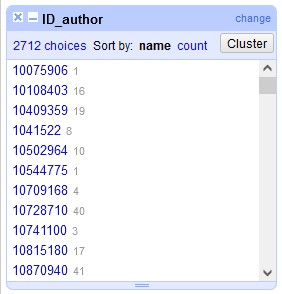

**Number of authors in departments of UPC**

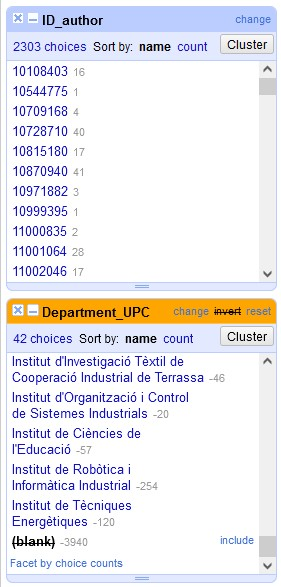


**Number of authors in research groups in UPC**

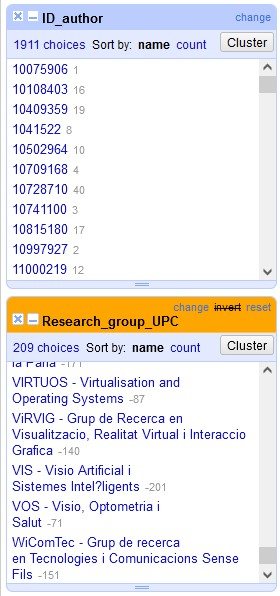

**Number of authors in UPC prt of both department(s) and research group(s)**

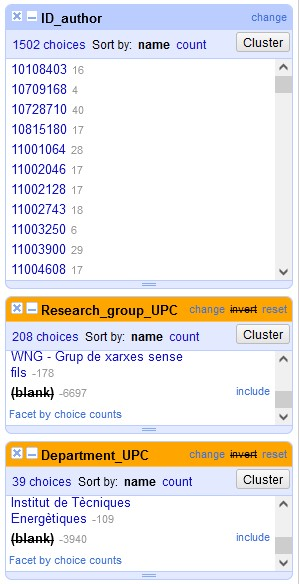

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

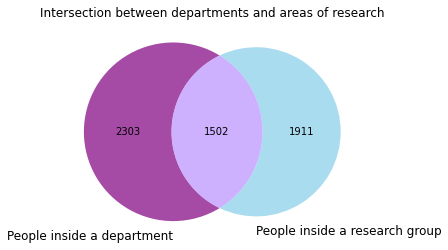

In [ ]:
venn2(subsets = (2303, 1911, 1502), 
      set_labels = ('People inside a department', 'People inside a research group'), 
      set_colors=('purple', 'skyblue'), alpha = 0.7);
      
plt.title("Intersection between departments and areas of research");

***Answer to Question 6:***

Out of the 2712 authors of academic papers from the Politehnic University of Catalunya, 2303 (aprox. 85%) are part of a departament or more, 1911 (aprox. 70%) are part of a research group or more and 1502 (aprox. 55%) are mart of both a departament and a research group.